<a href="https://colab.research.google.com/github/ImPrateekParashar/Cureya/blob/main/Titanic_Survival_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2) Data preprocessing


In [385]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier


# read train and test set
train = pd.read_csv("/content/drive/MyDrive/Cureya/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Cureya/test.csv")
combine = [train, test]




In [386]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [387]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [388]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [389]:
print(test.columns.values)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [390]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [391]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [392]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [393]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [394]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]

In [395]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 8), (418, 8))

In [396]:
# replacing the missing values in "Embarked" column with mode value

train['Embarked'].fillna(value = train['Embarked'].mode()[0], inplace = True)
test['Embarked'].fillna(value = test['Embarked'].mode()[0], inplace = True)

In [397]:
# replacing the missing values in "Age" column with mean value

train['Age'].fillna(value= train['Age'].mean(), inplace= True)
test['Age'].fillna(value= test['Age'].mean(), inplace= True)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [398]:
# replacing null values in "Fare" column

test['Fare'].fillna(value = test['Fare'].mean(), inplace = True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [399]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [400]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [401]:
# For columns 'Sibsp'(number of Siblings/spouses), 'Parch' (number of parents/child)

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [402]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [403]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,22.0,7.2500,0,0
1,1,1,1,38.0,71.2833,1,0
2,1,3,1,26.0,7.9250,0,1
3,1,1,1,35.0,53.1000,0,0
4,0,3,0,35.0,8.0500,0,1


In [404]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,892,3,0,34.5,7.8292,2,1
1,893,3,1,47.0,7.0000,0,0
2,894,2,0,62.0,9.6875,2,1
3,895,3,0,27.0,8.6625,0,1
4,896,3,1,22.0,12.2875,0,0


In [405]:
# For 'Fare' Column

train['FareBand'] = pd.qcut(train['Fare'], 3 , duplicates= 'drop')
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 8.662]",0.198052
1,"(8.662, 26.0]",0.402778
2,"(26.0, 512.329]",0.559322


In [406]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 2.0, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 2.0) & (dataset['Fare'] <= 3.0), 'Fare'] = 1
    dataset.loc[ dataset['Fare'] > 3.0, 'Fare'] = 2
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]
    
train.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,22.0,2,0,0
1,1,1,1,38.0,2,1,0
2,1,3,1,26.0,2,0,1
3,1,1,1,35.0,2,0,0
4,0,3,0,35.0,2,0,1


In [407]:
# To deal with 'Age' column

train['AgeBand'] = pd.cut(train['Age'], 5 , duplicates='drop')
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [408]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    dataset['Age'] = dataset['Age'].astype(int)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,AgeBand
0,0,3,0,1,2,0,0,"(16.336, 32.252]"
1,1,1,1,2,2,1,0,"(32.252, 48.168]"
2,1,3,1,1,2,0,1,"(16.336, 32.252]"
3,1,1,1,2,2,0,0,"(32.252, 48.168]"
4,0,3,0,2,2,0,1,"(32.252, 48.168]"


In [409]:
train = train.drop(['AgeBand'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1,2,0,0
1,1,1,1,2,2,1,0
2,1,3,1,1,2,0,1
3,1,1,1,2,2,0,0
4,0,3,0,2,2,0,1


In [410]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,892,3,0,2,2,2,1
1,893,3,1,2,2,0,0
2,894,2,0,3,2,2,1
3,895,3,0,1,2,0,1
4,896,3,1,1,2,0,0


In [411]:
#look at survival rate by class
train.groupby('Pclass')[['Survived']].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [412]:
#look at survival rate by sex and class
train.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
0,0.368852,0.157407,0.135447
1,0.968085,0.921053,0.500000


3) Visualise some of the attributes of the dataset.

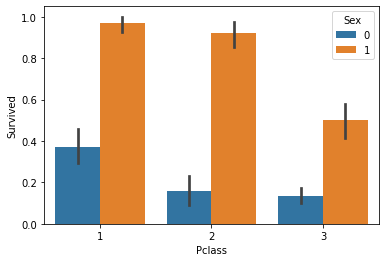

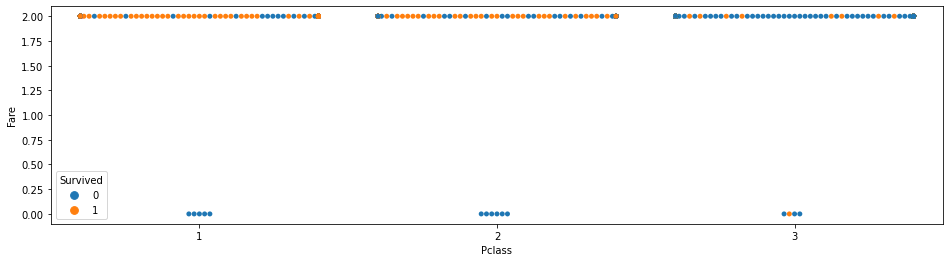

In [413]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)
plt.show()
plt.figure(figsize=(16, 4))
sns.swarmplot(x='Pclass', y='Fare', hue='Survived', data=train)
plt.show()

Observation:

---


The barplots above underline two interesting facts. The first one is that for each class more women survived than men, probably beacause in case of dangerous situations they must be saved first. The second is that most of the people who survived had payed a higher fare, thus implying that maybe they had some sort of advantage.

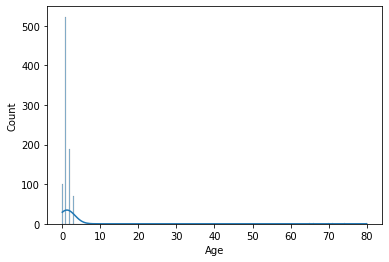

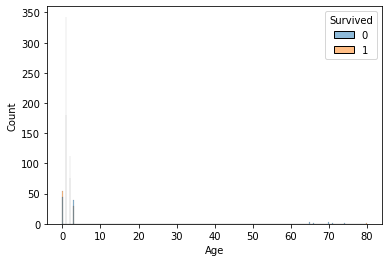

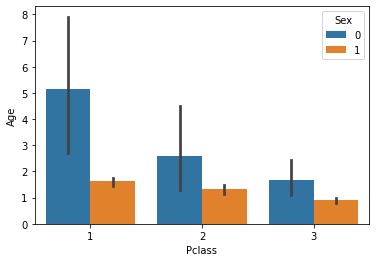

In [414]:
sns.histplot(data=train.Age, kde=True)
plt.show()
sns.histplot(x='Age', hue='Survived', data=train)
plt.show()
sns.barplot(x='Pclass', y='Age', hue='Sex', data=train)
plt.show()

Observation:

---


Most people are 16 to 36 years old and there is almost no passenger with more than 70 years; on the other side there is a significant number of kids within the 0 to 4 years old range. The survival rate is much higher for 0 to 8 years old population and for each class men are always older than women

In [415]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

6) Predict the survival using the following algorithms:
1. Logistic Regression




In [416]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

78.11

b) SVM


In [417]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.68

c) Use ensemble learning techniques
1. Bagging : Random Forest




In [418]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

83.16

2. Boosting : XGBoost(use Cross Validation and GridSearchCV
also)


In [419]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)
acc_xgb = round(model.score(X_train, Y_train) * 100, 2)
acc_xgb

82.72

7) Print your model's accuracy on training and testing datasets.


In [420]:
models = pd.DataFrame({'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost' ], 
                       'Score': [acc_log, acc_svc, acc_random_forest, acc_xgb ]})
models = models.sort_values(by='Score', ascending = False)
models

,Model,Score
2,Random Forest,83.16
3,XGBoost,82.72
1,SVM,78.68
0,Logistic Regression,78.11


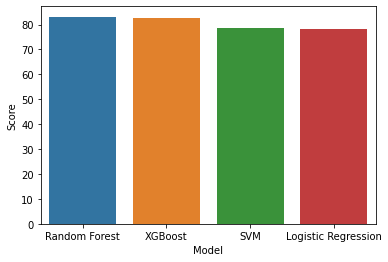

In [421]:
sns.barplot(x='Model', y='Score', ci=None, data=models)


8) Add an Evaluation Metrics(any of your choice).


In [422]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,892,3,0,2,2,2,1
1,893,3,1,2,2,0,0
2,894,2,0,3,2,2,1
3,895,3,0,1,2,0,1
4,896,3,1,1,2,0,0
